<a href="https://colab.research.google.com/github/julotec/hmk-09/blob/main/hmk9colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [11]:
# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data to include the channel dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [12]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train)

# Define the neural network architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [13]:
# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32,
                    validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f'Test accuracy: {test_accuracy:.4f}')

Epoch 1/20
1500/1500 [==============================] - 60s 38ms/step - loss: 0.6258 - accuracy: 0.7720 - val_loss: 0.3841 - val_accuracy: 0.8587
Epoch 2/20
1500/1500 [==============================] - 53s 36ms/step - loss: 0.4209 - accuracy: 0.8485 - val_loss: 0.3275 - val_accuracy: 0.8793
Epoch 3/20
1500/1500 [==============================] - 53s 35ms/step - loss: 0.3723 - accuracy: 0.8656 - val_loss: 0.3054 - val_accuracy: 0.8823
Epoch 4/20
1500/1500 [==============================] - 56s 37ms/step - loss: 0.3414 - accuracy: 0.8756 - val_loss: 0.2799 - val_accuracy: 0.8951
Epoch 5/20
1500/1500 [==============================] - 55s 37ms/step - loss: 0.3267 - accuracy: 0.8806 - val_loss: 0.2710 - val_accuracy: 0.8991
Epoch 6/20
1500/1500 [==============================] - 56s 37ms/step - loss: 0.3096 - accuracy: 0.8861 - val_loss: 0.2615 - val_accuracy: 0.9041
Epoch 7/20
1500/1500 [==============================] - 53s 36ms/step - loss: 0.2962 - accuracy: 0.8919 - val_loss: 0.2525 -

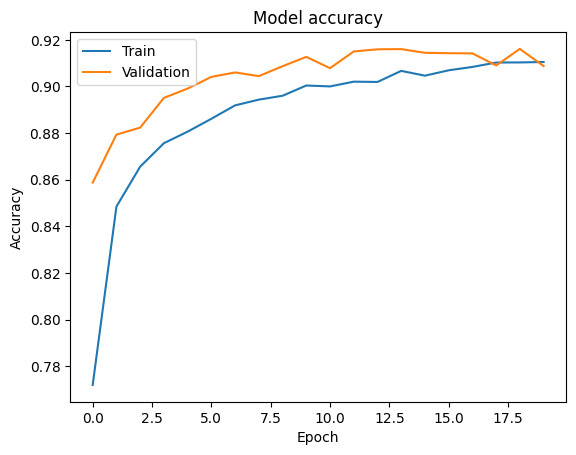

In [14]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

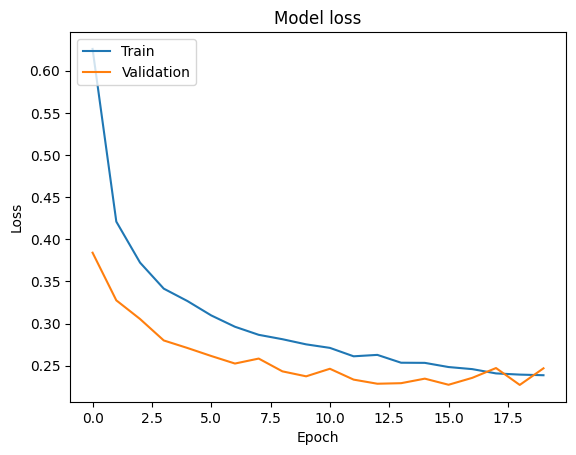

In [15]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()